In [10]:
import pickle
from os.path import exists

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MaxNLocator

mpl.rcParams.update({"font.size": 20})
mpl.rcParams.update({"figure.figsize": [6.4*1.5, 4.8*1.5]})

In [11]:
envs = ['cartpole_swingup', 'halfcheetah', 'humanoid_standup', 'pusher']
experiments = ['50_samples_CEM', '500_samples_CEM', '5000_samples_CEM', 'baseline', 'grad_opt']

In [12]:
env_to_data = {}

for env in envs:
    env_data = {}
    for exp in experiments:
        path = f'results/{env}/{exp}'
        if not exists(path):
            env_data[exp] = None
            continue
        with open(path, 'rb') as f:
            env_data[exp] = pickle.load(f)
    env_to_data[env] = env_data

In [13]:
labels = ['CEM (50 samples)', 'CEM (500 samples)', 'CEM (5000 samples)', 'baseline GD (no sampling)', 'CEM-GD (50 samples)']
colors = ['orange', 'chocolate', 'red', 'slategrey', 'blue']
trial_len = [100, 100, 100, 200]

label_dict = dict(zip(experiments, labels))
color_dict = dict(zip(experiments, colors))
trial_dict = dict(zip(envs, trial_len))

In [14]:
def mean_std(data):
    data = np.array(data)
    avg = np.mean(data, axis=0)[1:]
    std = np.std(data, axis=0)[1:]
    return avg, std

In [15]:
env_to_avgstd = {}
for env in env_to_data:
    all_data = env_to_data[env]
    
    exp_to_avg = {}
    exp_to_std = {}
    for exp in experiments:
        data = all_data[exp]
        if data is not None:
            avg, std = mean_std(data)
            exp_to_avg[exp] = avg
            exp_to_std[exp] = std
    env_to_avgstd[env] = exp_to_avg, exp_to_std

In [57]:
with open(f'results/pusher/50_samples_CEM', 'rb') as file:
    #OPT
    cem50 = pickle.load(file)
    
with open(f'results/pusher/500_samples_CEM', 'rb') as file:
    #CEM
    cem500 = pickle.load(file)
    
with open(f'results/pusher/5000_samples_CEM', 'rb') as file:
    #CEM
    cem5000 = pickle.load(file)
    
with open(f'results/pusher/baseline', 'rb') as file:
    #CEM
    baseline = pickle.load(file)
    
with open(f'results/pusher/grad_opt', 'rb') as file:
    #CEM
    grad = pickle.load(file)
            
all_data = [cem50, cem500, cem5000, baseline, grad]
labels = ['CEM (50 samples)', 'CEM (500 samples)', 'CEM (5000 samples)', 'baseline opt (no sampling)', 'grad opt (50 samples)']
colors = ['gold', 'chocolate', 'red', 'slategrey', 'blue']

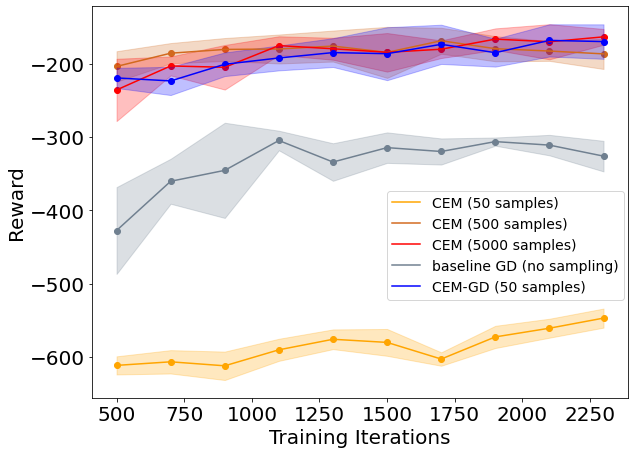

In [23]:
env = envs[3]
avgs, stds = env_to_avgstd[env]
experiments = ['50_samples_CEM', '500_samples_CEM', '5000_samples_CEM', 'baseline', 'grad_opt']
for exp in experiments:
    if exp not in avgs:
        continue
        
    y = avgs[exp]
    error = np.sqrt(stds[exp])
    x = np.arange(len(y))*trial_dict[env] + 500

    plt.plot(x, y, c=color_dict[exp], label=label_dict[exp])
    plt.scatter(x, y, c=color_dict[exp])
    plt.fill_between(x, y - error, y + error, color=color_dict[exp], alpha=0.25)
    
    plt.legend(loc=(0.55, 0.25), prop={'size': 14})
    plt.xlabel('Training Iterations')
    plt.ylabel('Reward')
    plt.savefig(f'figures/{env}.pdf', format='pdf',  bbox_inches='tight')